In [1]:
import requests 
from selenium import webdriver as wd 
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC
import time
import random
import re
import pandas as pd
import json # import json module
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
with open('와디즈_개인정보.json') as json_file:
    json_data = json.load(json_file)

In [3]:
df = pd.DataFrame(json_data['data'])

In [4]:
df.head()

,index,names,interest,funding_list,like_list
0,0,회영,"[교육∙키즈, 패션∙잡화∙뷰티, 홈리빙∙디자인소품, 스포츠∙모빌리티, 출판, 반려동...","[[[속보] 설탕이 아니어도 맛있어, 아이도 어른도 홀딱 반한 요거트 나타나, 푸드...","[[[속보] 설탕이 아니어도 맛있어, 아이도 어른도 홀딱 반한 요거트 나타나, 푸드..."
1,1,최수진,[],"[[[위장 약한 댕냥이 주목] 신선하고 바르게 자연방목으로 길러낸 산양유, 반려동물...","[[[2만원대/괴물스펙] 각도가 습도를 바꾼다! 분무량 끝판왕 무선가습기, 테크·가..."
2,2,최승혁,[],"[[숙성된 감이 통째로! 촉촉함을 가득 담은 바디워시-카키, 뷰티], [호흡으로 혁...","[[[앵콜] 내 방에서 200평대 헬스장과 전문가의 PT를 만나다, 스포츠·모빌리티..."
3,3,Jake WJ,[],"[[[당류0%,1/2칼로리] 설탕을 벗어던진 달콤청량 슈퍼드링크 등장!, 푸드], ...",[]
4,4,오세원,[],[],"[[[No슈가 + No밀크] 칼로리DOWN 밀크티와 라떼로 달달한 충전, 푸드], ..."


In [7]:
df.funding_list

0      [[[속보] 설탕이 아니어도 맛있어, 아이도 어른도 홀딱 반한 요거트 나타나, 푸드...
1      [[[위장 약한 댕냥이 주목] 신선하고 바르게 자연방목으로 길러낸 산양유, 반려동물...
2      [[숙성된 감이 통째로! 촉촉함을 가득 담은 바디워시-카키, 뷰티], [호흡으로 혁...
3      [[[당류0%,1/2칼로리] 설탕을 벗어던진 달콤청량 슈퍼드링크 등장!, 푸드], ...
4                                                     []
                             ...                        
315    [[커피는 먹고 싶은데, 몸 걱정에 조심스럽다면, '콩'드브루 하세요!, 푸드], ...
316    [[[4.9 앵콜! 저세상 쫀득꼬끄] 당과 탄수까지 줄인 순탄수사그램 마카롱, 푸드...
317        [[[당류0%,1/2칼로리] 설탕을 벗어던진 달콤청량 슈퍼드링크 등장!, 푸드]]
318        [[[당류0%,1/2칼로리] 설탕을 벗어던진 달콤청량 슈퍼드링크 등장!, 푸드]]
319    [[3000원의 행복! 한국자체개발 마스크스트랩 투명 마스크줄 Maskzul, 패션...
Name: funding_list, Length: 320, dtype: object

In [5]:
from apyori import apriori

# 우선보자

# Funding_list

In [6]:
fund = [element for array in list(df.funding_list) for element in array]

In [7]:
fund[0:5]

[['[속보] 설탕이 아니어도 맛있어, 아이도 어른도 홀딱 반한 요거트 나타나', '푸드'],
 ['[제주바다의 깊은 맛] 딱새우를 로스팅하여 얼큰한 라면에 담았다!', '푸드'],
 ['무밀가루!저당류! 타이거 쿠키, 디저트 습관을 건강하게', '푸드'],
 ['[헤븐 쿠키] 장수군 프랑스 블랑제리, 지금 만나러 갑니다', '푸드'],
 ['"육즙 팡~ 한우가 씹히는!" 진한 라구소스 볼로네제 라자냐 파스타', '푸드']]

In [8]:
fund_series = [element for array in fund for element in array]

In [9]:
from pandas import Series

In [10]:
fund_series = pd.Series(fund_series)

In [11]:
a = pd.DataFrame(fund_series.value_counts())

In [12]:
a.head(10)

,0
푸드,3816
패션·잡화,2743
홈리빙,2141
테크·가전,1952
뷰티,1559
반려동물,620
디자인소품,393
스포츠·모빌리티,392
"[당류0%,1/2칼로리] 설탕을 벗어던진 달콤청량 슈퍼드링크 등장!",293
여행·레저,238


In [13]:
aa = a.iloc[0:20] ; aa

,0
푸드,3816
패션·잡화,2743
홈리빙,2141
테크·가전,1952
뷰티,1559
반려동물,620
디자인소품,393
스포츠·모빌리티,392
"[당류0%,1/2칼로리] 설탕을 벗어던진 달콤청량 슈퍼드링크 등장!",293
여행·레저,238


In [14]:
aa = aa.drop(['[당류0%,1/2칼로리] 설탕을 벗어던진 달콤청량 슈퍼드링크 등장!','[5700%앵콜]#설탕쏙뺀 8kcal 탄산음료 #마시는샤인머스캣 샤인클링',
            '[말차러버주목] 설탕은 빼고, 달콤함은 그대로! 슈퍼말차', '[1억앵콜] #설탕쏙뺀 8kcal 탄산음료, 리얼 복숭아 피치클링!',
            '[평점4.9앵콜]지금까지 이런 초콜릿은 없었다! #당류0g #무설탕초콜릿'])

In [15]:
sum_fund = sum(aa[0]); sum_fund

14190

In [16]:
aa['ratio'] = a[0] / sum_fund

In [17]:
aa.shape[0]

15

In [18]:
aa

,0,ratio
푸드,3816,0.268922
패션·잡화,2743,0.193305
홈리빙,2141,0.150881
테크·가전,1952,0.137562
뷰티,1559,0.109866
반려동물,620,0.043693
디자인소품,393,0.027696
스포츠·모빌리티,392,0.027625
여행·레저,238,0.016772
게임·취미,74,0.005215


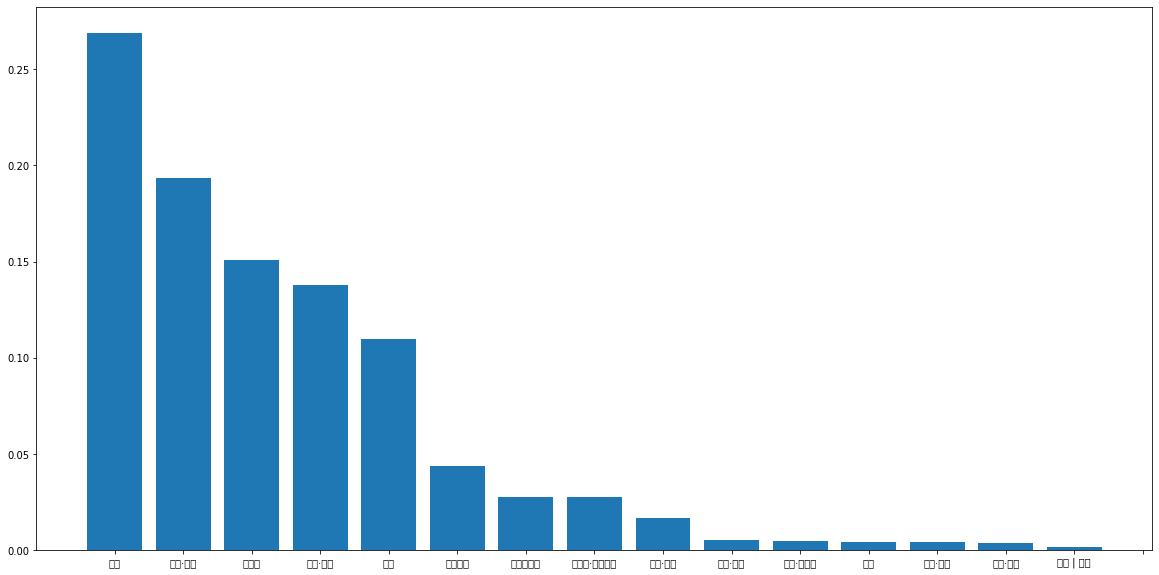

In [19]:
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (20,10)

ax = plt.subplot()
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15])

ax.set_xticklabels(['푸드', '패션·잡화', '홈리빙', '테크·가전', '뷰티', '반려동물', '디자인소품','스포츠·모빌리티', '여행·레저', '게임·취미', '소셜·캠페인', '출판', '교육·키즈', '공연·컬쳐','채권 | 영화'])

plt.bar(range(len(aa['ratio'])),aa['ratio'])

plt.show()

#### - 푸드, 패션잡화, 홈리빙, 테크가전, 뷰티 // 반려동물, 디자인소품, 스포츠모빌리티, 여행레저, 게임취미, 소셜캠패인, 출판, 교육키즈, 공연컬쳐, 채권영화, 주식F|B

In [20]:
b = a.drop(['푸드', '패션·잡화', '홈리빙', '테크·가전', '뷰티', '반려동물', '디자인소품','스포츠·모빌리티', '여행·레저', '게임·취미', '소셜·캠페인', '출판', '교육·키즈', '공연·컬쳐','채권 | 영화','주식 | F&B' ])

In [28]:
c = b[b[0] >= 10]

In [29]:
c.to_csv('와디즈10이상.csv')

# like list

In [145]:
like = [element for array in list(df.like_list) for element in array]
like_series = [element for array in like for element in array]
like_series = pd.Series(like_series)
a = pd.DataFrame(like_series.value_counts())

In [153]:
aa = a.iloc[0:14]
sum_like = sum(aa[0]); sum_like

3375

In [156]:
aa['ratio'] = a[0] / sum_fund

In [158]:
aa

,0,ratio
패션·잡화,898,0.063284
푸드,616,0.043411
홈리빙,525,0.036998
테크·가전,431,0.030374
뷰티,350,0.024665
반려동물,127,0.008950
스포츠·모빌리티,125,0.008809
디자인소품,70,0.004933
출판,67,0.004722
교육·키즈,49,0.003453


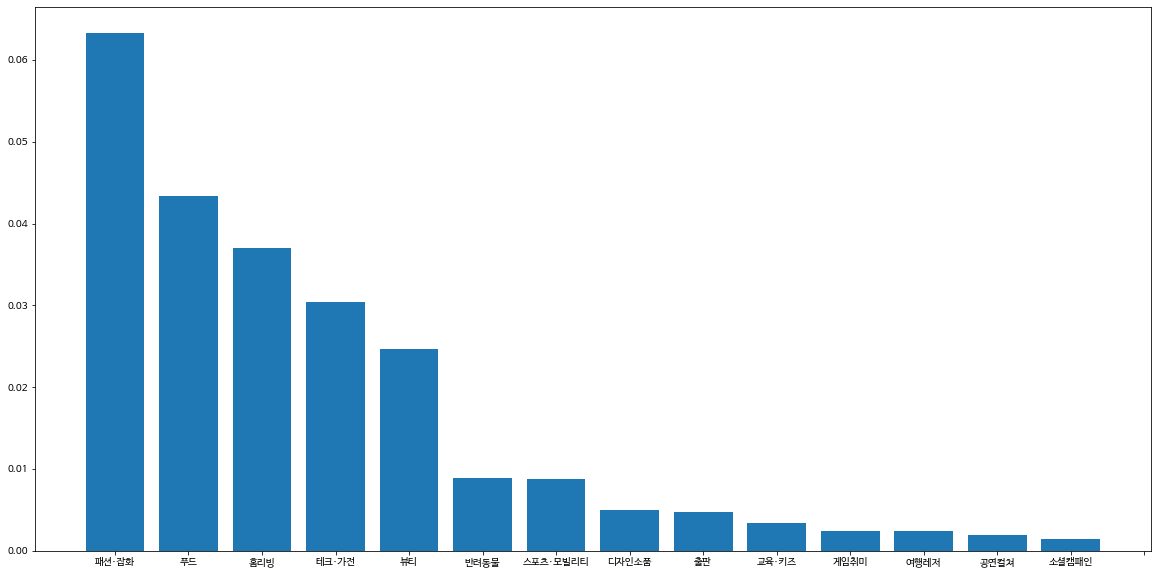

In [159]:
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (20,10)

ax = plt.subplot()

ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14])

ax.set_xticklabels(['패션·잡화','푸드', '홈리빙', '테크·가전', '뷰티', '반려동물', 
                    '스포츠·모빌리티','디자인소품', '출판', '교육·키즈','게임취미', 
                    '여행레저', '공연컬쳐', '소셜캠패인'])

plt.bar(range(len(aa['ratio'])),aa['ratio'])

plt.show()

In [161]:
b = a.drop(['푸드', '패션·잡화', '홈리빙', '테크·가전', '뷰티', '반려동물', '디자인소품','스포츠·모빌리티', '여행·레저', '게임·취미', '소셜·캠페인', '출판', '교육·키즈', '공연·컬쳐','주식 | F&B' ])

In [162]:
b.head(20)

,0
[제주바다의 깊은 맛] 딱새우를 로스팅하여 얼큰한 라면에 담았다!,15
<와디즈에 오뚜기가 떴다> 오뚜기스프'반백살'기념 뚜기두밥상 탄생,12
[8035%앵콜] 올인원 블랙헤드 케어! 이건 정말 확실하죠?,12
"[육즙이 좌르르, 진짜고기 뺨쳤다] 상상초월 식물성고기의 등장, 언리미트",12
믿기지 않는 쫀쫀함! 38년 요거트 장인이 만든 <단백질 두유 요거트>,12
"[1억앵콜] #설탕쏙뺀 8kcal 탄산음료, 리얼 복숭아 피치클링!",12
약혐 - 처음 선보이는 피지 다이어트! 헤드팝 포커스,12
"[아마존Top브랜드]앞으로 이거 없으면 소주 못마셔요, 호락소주에어레이터",12
[ 코어운동 부스터 ] 앉아서! 기대서 ! 누어서 ! 돌려돌려~ 코어스핀,12
[2.2억/8차] 우유빛깔 피부를 위한 휘핑클렌저 <세수한번 굿모링>,11


# Network 

In [99]:
%%time

result = list(apriori(fund, min_support = 0.0005))

Wall time: 1.69 s


In [100]:
data = pd.DataFrame(result)

In [101]:
data.sort_values(by = 'support', ascending = False)

,items,support,ordered_statistics
196,(푸드),0.267021,"[((), (푸드), 0.2670212021552026, 1.0)]"
191,(패션·잡화),0.191939,"[((), (패션·잡화), 0.1919389825764467, 1.0)]"
199,(홈리빙),0.149815,"[((), (홈리빙), 0.14981456860961445, 1.0)]"
189,(테크·가전),0.136589,"[((), (테크·가전), 0.13658946189909735, 1.0)]"
151,(뷰티),0.109090,"[((), (뷰티), 0.10908963683437128, 1.0)]"
...,...,...,...
292,"(홈리빙, [와디즈 수건 1등] 99.9% 항균 수건이 핸드타월로 돌아왔습니다!)",0.000560,"[((), ([와디즈 수건 1등] 99.9% 항균 수건이 핸드타월로 돌아왔습니다!,..."
288,"(패션·잡화, [앵콜] 키높이와 바른자세를 동시에 잡을 수 있을까? #키높이 밸런스깔창)",0.000560,"[((), (패션·잡화, [앵콜] 키높이와 바른자세를 동시에 잡을 수 있을까? #키..."
92,"([와디즈단독] 600억 판매, 3D분리팬티의 끝판왕 #라쉬반)",0.000560,"[((), ([와디즈단독] 600억 판매, 3D분리팬티의 끝판왕 #라쉬반), 0.0..."
37,([3차앵콜]샤인머스켓 중에 가장 귀하다는 수출용 샤인머스켓을 경험해보세요),0.000560,"[((), ([3차앵콜]샤인머스켓 중에 가장 귀하다는 수출용 샤인머스켓을 경험해보세..."


In [102]:
# 지지도 : 

In [103]:
data['length'] = data['items'].apply(lambda x: len(x))

In [104]:
data

,items,support,ordered_statistics,length
0,"(""누가 요새 들고 다니니?"" 땀쟁이들은 미리 준비해! 넥밴드 선풍기)",0.00077,"[((), (""누가 요새 들고 다니니?"" 땀쟁이들은 미리 준비해! 넥밴드 선풍기),...",1
1,"(""아직도 모니터받침대 쓰세요?"" 100%공간창출, RGB효과, 능률상승)",0.00070,"[((), (""아직도 모니터받침대 쓰세요?"" 100%공간창출, RGB효과, 능률상승...",1
2,"(#설탕쏙뺀 8kcal 탄산음료, [마시는 샤인머스캣] 리얼과즙 샤인클링)",0.00098,"[((), (#설탕쏙뺀 8kcal 탄산음료, [마시는 샤인머스캣] 리얼과즙 샤인클링...",1
3,(11년을 입을 수 있는 11색 무지티),0.00077,"[((), (11년을 입을 수 있는 11색 무지티), 0.00076971520537...",1
4,(1만원대 갓성비로 당신의 허리에 편안함을 더해줄 <세상 편한 밴딩벨트>),0.00077,"[((), (1만원대 갓성비로 당신의 허리에 편안함을 더해줄 <세상 편한 밴딩벨트>...",1
...,...,...,...,...
379,"(평균 머리무게4kg, 이제 목에도 지지대가 필요하다 [퓨어플랜 넥서포터], 홈리빙)",0.00084,"[((), (평균 머리무게4kg, 이제 목에도 지지대가 필요하다 [퓨어플랜 넥서포터...",2
380,"(푸드, 평점4.9앵콜ㅣ리얼 감량 후기 + 100만원 상금 미션 [리아퐁])",0.00063,"[((), (푸드, 평점4.9앵콜ㅣ리얼 감량 후기 + 100만원 상금 미션 [리아퐁...",2
381,"(푸드, 한 통 다 먹어도 240kcal! 건강한 아이스크림)",0.00056,"[((), (푸드, 한 통 다 먹어도 240kcal! 건강한 아이스크림), 0.00...",2
382,"(홈리빙, 푸딩이야 베개야? 내 목에 딱 맞는 '숙면 핏' 기능성 베개! <핏넥>)",0.00063,"[((), (홈리빙, 푸딩이야 베개야? 내 목에 딱 맞는 '숙면 핏' 기능성 베개!...",2


In [105]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [106]:
data = data[(data['length'] == 2)]

In [107]:
data

,items,support,ordered_statistics,length
201,"(테크·가전, ""누가 요새 들고 다니니?"" 땀쟁이들은 미리 준비해! 넥밴드 선풍기)",0.00077,"[((), (테크·가전, ""누가 요새 들고 다니니?"" 땀쟁이들은 미리 준비해! 넥밴...",2
202,"(테크·가전, ""아직도 모니터받침대 쓰세요?"" 100%공간창출, RGB효과, 능률상승)",0.00070,"[((), (테크·가전, ""아직도 모니터받침대 쓰세요?"" 100%공간창출, RGB효...",2
203,"(푸드, #설탕쏙뺀 8kcal 탄산음료, [마시는 샤인머스캣] 리얼과즙 샤인클링)",0.00098,"[((), (푸드, #설탕쏙뺀 8kcal 탄산음료, [마시는 샤인머스캣] 리얼과즙 ...",2
204,"(패션·잡화, 11년을 입을 수 있는 11색 무지티)",0.00077,"[((), (패션·잡화, 11년을 입을 수 있는 11색 무지티), 0.0007697...",2
205,"(패션·잡화, 1만원대 갓성비로 당신의 허리에 편안함을 더해줄 <세상 편한 밴딩벨트>)",0.00077,"[((), (패션·잡화, 1만원대 갓성비로 당신의 허리에 편안함을 더해줄 <세상 편...",2
...,...,...,...,...
379,"(평균 머리무게4kg, 이제 목에도 지지대가 필요하다 [퓨어플랜 넥서포터], 홈리빙)",0.00084,"[((), (평균 머리무게4kg, 이제 목에도 지지대가 필요하다 [퓨어플랜 넥서포터...",2
380,"(푸드, 평점4.9앵콜ㅣ리얼 감량 후기 + 100만원 상금 미션 [리아퐁])",0.00063,"[((), (푸드, 평점4.9앵콜ㅣ리얼 감량 후기 + 100만원 상금 미션 [리아퐁...",2
381,"(푸드, 한 통 다 먹어도 240kcal! 건강한 아이스크림)",0.00056,"[((), (푸드, 한 통 다 먹어도 240kcal! 건강한 아이스크림), 0.00...",2
382,"(홈리빙, 푸딩이야 베개야? 내 목에 딱 맞는 '숙면 핏' 기능성 베개! <핏넥>)",0.00063,"[((), (홈리빙, 푸딩이야 베개야? 내 목에 딱 맞는 '숙면 핏' 기능성 베개!...",2


In [108]:
G = nx.Graph()
ar = (data['items']) ; G.add_edges_from(ar)

In [109]:
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 *  (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [110]:
pos = nx.planar_layout(G)

In [111]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="NanumBarunGothic.ttf").get_name()
rc('font', family=font_name, size = 10)

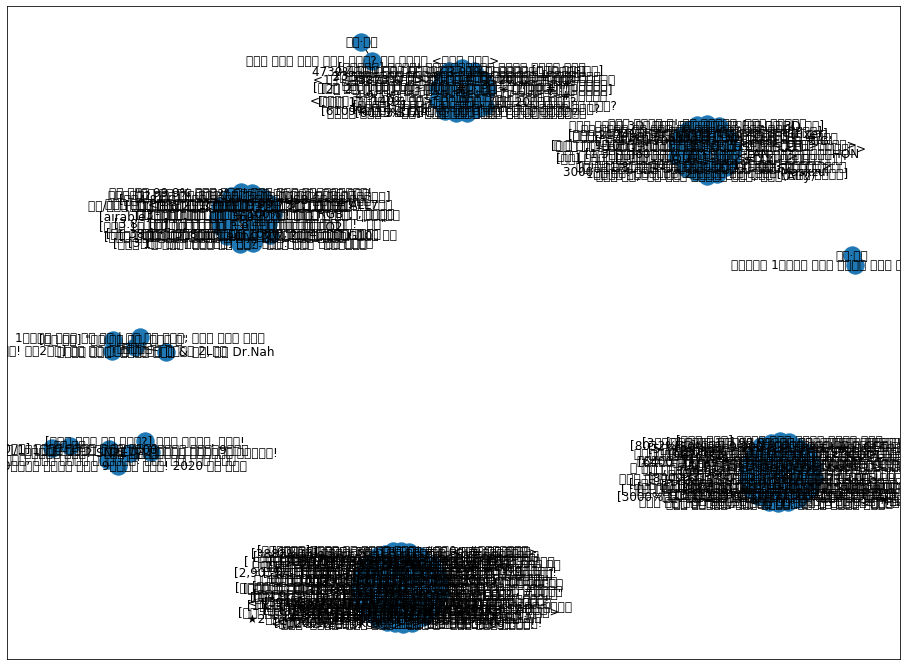

In [115]:
plt.figure(figsize = (16,12))

#nx.draw_networkx_labels(G, pos, font_family=font_name,font_size=10)

nx.draw_networkx(G
                ,font_family = 'NanumBarunGothic.ttf')